In [114]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Dataset
from torch import nn
from PIL import Image
import os
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm

In [115]:
%matplotlib inline

In [86]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=4, stride=2, padding=1),  # 32x32
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1),  # 16x16
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),  # 8x8
            nn.ReLU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),  # 16x16
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),  # 32x32
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, kernel_size=4, stride=2, padding=1),  # 64x64
            nn.Sigmoid()  # Output between [0, 1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [87]:
class CustomImageDataset(Dataset):
    def __init__(self, image_directory, transform=None):
        self.image_directory = image_directory
        self.image_filenames = [f for f in os.listdir(image_directory) if f.endswith(('.png', '.jpg', '.jpeg'))]
        self.transform = transform

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_directory, self.image_filenames[idx])
        image = Image.open(img_path).convert('RGB')  # Convert image to RGB

        if self.transform:
            image = self.transform(image)

        return image  # Ensure you're returning the image, not its filename or path

In [88]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images to 64x64
    transforms.ToTensor(),  # Convert PIL image to PyTorch tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1, 1] for all 3 RGB channels
])

In [89]:
train_dataset_path = "SmallerDataset/Train/"

In [90]:
train_dataset = CustomImageDataset(train_dataset_path, transform=transform)

In [91]:
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=False)

In [92]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [93]:
device

'cuda'

In [94]:
# defining the model
model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [95]:
num_epochs = 100

for epoch in tqdm(range(num_epochs)):
    for batch_images in train_dataloader:
        batch_images = batch_images.to(device)

        # Forward pass
        outputs = model(batch_images)
        loss = criterion(outputs, batch_images)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

  1%|          | 1/100 [00:24<41:00, 24.85s/it]

Epoch [1/100], Loss: 0.4559


  2%|▏         | 2/100 [00:48<39:26, 24.15s/it]

Epoch [2/100], Loss: 0.4514


  3%|▎         | 3/100 [01:11<38:25, 23.76s/it]

Epoch [3/100], Loss: 0.4486


  4%|▍         | 4/100 [01:36<38:45, 24.23s/it]

Epoch [4/100], Loss: 0.4471


  5%|▌         | 5/100 [02:00<38:13, 24.14s/it]

Epoch [5/100], Loss: 0.4463


  6%|▌         | 6/100 [02:24<37:45, 24.10s/it]

Epoch [6/100], Loss: 0.4459


  7%|▋         | 7/100 [02:48<37:15, 24.04s/it]

Epoch [7/100], Loss: 0.4455


  8%|▊         | 8/100 [03:11<36:28, 23.79s/it]

Epoch [8/100], Loss: 0.4452


  9%|▉         | 9/100 [03:36<36:15, 23.91s/it]

Epoch [9/100], Loss: 0.4449


 10%|█         | 10/100 [04:00<36:08, 24.10s/it]

Epoch [10/100], Loss: 0.4448


 11%|█         | 11/100 [04:24<35:49, 24.15s/it]

Epoch [11/100], Loss: 0.4446


 12%|█▏        | 12/100 [04:48<35:14, 24.03s/it]

Epoch [12/100], Loss: 0.4445


 13%|█▎        | 13/100 [05:12<34:33, 23.84s/it]

Epoch [13/100], Loss: 0.4445


 14%|█▍        | 14/100 [05:36<34:27, 24.04s/it]

Epoch [14/100], Loss: 0.4444


 15%|█▌        | 15/100 [06:00<34:01, 24.02s/it]

Epoch [15/100], Loss: 0.4444


 16%|█▌        | 16/100 [06:24<33:32, 23.95s/it]

Epoch [16/100], Loss: 0.4443


 17%|█▋        | 17/100 [06:47<32:59, 23.85s/it]

Epoch [17/100], Loss: 0.4443


 18%|█▊        | 18/100 [07:11<32:20, 23.67s/it]

Epoch [18/100], Loss: 0.4441


 19%|█▉        | 19/100 [07:35<32:11, 23.85s/it]

Epoch [19/100], Loss: 0.4441


 20%|██        | 20/100 [07:59<31:51, 23.89s/it]

Epoch [20/100], Loss: 0.4441


 21%|██        | 21/100 [08:23<31:35, 23.99s/it]

Epoch [21/100], Loss: 0.4440


 22%|██▏       | 22/100 [08:47<31:17, 24.08s/it]

Epoch [22/100], Loss: 0.4440


 23%|██▎       | 23/100 [09:11<30:39, 23.89s/it]

Epoch [23/100], Loss: 0.4440


 24%|██▍       | 24/100 [09:36<30:35, 24.15s/it]

Epoch [24/100], Loss: 0.4439


 25%|██▌       | 25/100 [10:00<30:21, 24.28s/it]

Epoch [25/100], Loss: 0.4439


 26%|██▌       | 26/100 [10:24<29:54, 24.25s/it]

Epoch [26/100], Loss: 0.4439


 27%|██▋       | 27/100 [10:49<29:34, 24.31s/it]

Epoch [27/100], Loss: 0.4438


 28%|██▊       | 28/100 [11:13<29:12, 24.34s/it]

Epoch [28/100], Loss: 0.4438


 29%|██▉       | 29/100 [11:39<29:06, 24.60s/it]

Epoch [29/100], Loss: 0.4437


 30%|███       | 30/100 [12:03<28:47, 24.68s/it]

Epoch [30/100], Loss: 0.4437


 31%|███       | 31/100 [12:28<28:30, 24.79s/it]

Epoch [31/100], Loss: 0.4437


 32%|███▏      | 32/100 [12:53<27:59, 24.69s/it]

Epoch [32/100], Loss: 0.4437


 33%|███▎      | 33/100 [13:17<27:30, 24.64s/it]

Epoch [33/100], Loss: 0.4437


 34%|███▍      | 34/100 [13:43<27:28, 24.98s/it]

Epoch [34/100], Loss: 0.4437


 35%|███▌      | 35/100 [14:08<26:54, 24.84s/it]

Epoch [35/100], Loss: 0.4436


 36%|███▌      | 36/100 [14:33<26:34, 24.91s/it]

Epoch [36/100], Loss: 0.4436


 37%|███▋      | 37/100 [14:57<26:00, 24.76s/it]

Epoch [37/100], Loss: 0.4436


 38%|███▊      | 38/100 [15:21<25:27, 24.63s/it]

Epoch [38/100], Loss: 0.4435


 39%|███▉      | 39/100 [15:46<25:06, 24.70s/it]

Epoch [39/100], Loss: 0.4435


 40%|████      | 40/100 [16:11<24:46, 24.77s/it]

Epoch [40/100], Loss: 0.4435


 41%|████      | 41/100 [16:36<24:19, 24.74s/it]

Epoch [41/100], Loss: 0.4435


 42%|████▏     | 42/100 [17:01<23:56, 24.77s/it]

Epoch [42/100], Loss: 0.4435


 43%|████▎     | 43/100 [17:25<23:29, 24.73s/it]

Epoch [43/100], Loss: 0.4435


 44%|████▍     | 44/100 [17:51<23:12, 24.87s/it]

Epoch [44/100], Loss: 0.4435


 45%|████▌     | 45/100 [18:15<22:46, 24.84s/it]

Epoch [45/100], Loss: 0.4434


 46%|████▌     | 46/100 [18:40<22:15, 24.74s/it]

Epoch [46/100], Loss: 0.4434


 47%|████▋     | 47/100 [19:05<21:51, 24.74s/it]

Epoch [47/100], Loss: 0.4434


 48%|████▊     | 48/100 [19:30<21:35, 24.91s/it]

Epoch [48/100], Loss: 0.4434


 49%|████▉     | 49/100 [19:55<21:13, 24.97s/it]

Epoch [49/100], Loss: 0.4434


 50%|█████     | 50/100 [20:20<20:49, 24.99s/it]

Epoch [50/100], Loss: 0.4434


 51%|█████     | 51/100 [20:45<20:25, 25.01s/it]

Epoch [51/100], Loss: 0.4434


 52%|█████▏    | 52/100 [21:09<19:45, 24.70s/it]

Epoch [52/100], Loss: 0.4434


 53%|█████▎    | 53/100 [21:34<19:27, 24.84s/it]

Epoch [53/100], Loss: 0.4433


 54%|█████▍    | 54/100 [22:00<19:14, 25.09s/it]

Epoch [54/100], Loss: 0.4433


 55%|█████▌    | 55/100 [22:26<18:54, 25.22s/it]

Epoch [55/100], Loss: 0.4433


 56%|█████▌    | 56/100 [22:50<18:23, 25.07s/it]

Epoch [56/100], Loss: 0.4433


 57%|█████▋    | 57/100 [23:15<17:57, 25.05s/it]

Epoch [57/100], Loss: 0.4433


 58%|█████▊    | 58/100 [23:40<17:28, 24.98s/it]

Epoch [58/100], Loss: 0.4433


 59%|█████▉    | 59/100 [24:05<16:57, 24.82s/it]

Epoch [59/100], Loss: 0.4433


 60%|██████    | 60/100 [24:29<16:28, 24.71s/it]

Epoch [60/100], Loss: 0.4433


 61%|██████    | 61/100 [24:53<15:59, 24.59s/it]

Epoch [61/100], Loss: 0.4433


 62%|██████▏   | 62/100 [25:17<15:30, 24.48s/it]

Epoch [62/100], Loss: 0.4433


 63%|██████▎   | 63/100 [25:43<15:12, 24.67s/it]

Epoch [63/100], Loss: 0.4433


 64%|██████▍   | 64/100 [26:07<14:48, 24.68s/it]

Epoch [64/100], Loss: 0.4433


 65%|██████▌   | 65/100 [26:32<14:28, 24.82s/it]

Epoch [65/100], Loss: 0.4433


 66%|██████▌   | 66/100 [26:57<13:56, 24.61s/it]

Epoch [66/100], Loss: 0.4432


 67%|██████▋   | 67/100 [27:21<13:28, 24.51s/it]

Epoch [67/100], Loss: 0.4432


 68%|██████▊   | 68/100 [27:46<13:07, 24.61s/it]

Epoch [68/100], Loss: 0.4433


 69%|██████▉   | 69/100 [28:11<12:48, 24.79s/it]

Epoch [69/100], Loss: 0.4432


 70%|███████   | 70/100 [28:35<12:20, 24.67s/it]

Epoch [70/100], Loss: 0.4432


 71%|███████   | 71/100 [29:00<11:52, 24.56s/it]

Epoch [71/100], Loss: 0.4432


 72%|███████▏  | 72/100 [29:24<11:25, 24.48s/it]

Epoch [72/100], Loss: 0.4432


 73%|███████▎  | 73/100 [29:49<11:05, 24.65s/it]

Epoch [73/100], Loss: 0.4432


 74%|███████▍  | 74/100 [30:14<10:40, 24.64s/it]

Epoch [74/100], Loss: 0.4432


 75%|███████▌  | 75/100 [30:38<10:15, 24.62s/it]

Epoch [75/100], Loss: 0.4432


 76%|███████▌  | 76/100 [31:02<09:42, 24.29s/it]

Epoch [76/100], Loss: 0.4432


 77%|███████▋  | 77/100 [31:26<09:19, 24.33s/it]

Epoch [77/100], Loss: 0.4431


 78%|███████▊  | 78/100 [31:51<08:57, 24.44s/it]

Epoch [78/100], Loss: 0.4431


 79%|███████▉  | 79/100 [32:15<08:34, 24.52s/it]

Epoch [79/100], Loss: 0.4432


 80%|████████  | 80/100 [32:41<08:14, 24.73s/it]

Epoch [80/100], Loss: 0.4432


 81%|████████  | 81/100 [33:05<07:46, 24.56s/it]

Epoch [81/100], Loss: 0.4431


 82%|████████▏ | 82/100 [33:30<07:23, 24.64s/it]

Epoch [82/100], Loss: 0.4432


 83%|████████▎ | 83/100 [33:55<07:02, 24.83s/it]

Epoch [83/100], Loss: 0.4431


 84%|████████▍ | 84/100 [34:20<06:39, 24.94s/it]

Epoch [84/100], Loss: 0.4431


 85%|████████▌ | 85/100 [34:45<06:12, 24.84s/it]

Epoch [85/100], Loss: 0.4431


 86%|████████▌ | 86/100 [35:09<05:44, 24.62s/it]

Epoch [86/100], Loss: 0.4431


 87%|████████▋ | 87/100 [35:33<05:19, 24.60s/it]

Epoch [87/100], Loss: 0.4431


 88%|████████▊ | 88/100 [35:58<04:55, 24.63s/it]

Epoch [88/100], Loss: 0.4431


 89%|████████▉ | 89/100 [36:23<04:30, 24.62s/it]

Epoch [89/100], Loss: 0.4431


 90%|█████████ | 90/100 [36:47<04:05, 24.55s/it]

Epoch [90/100], Loss: 0.4431


 91%|█████████ | 91/100 [37:11<03:38, 24.32s/it]

Epoch [91/100], Loss: 0.4431


 92%|█████████▏| 92/100 [37:36<03:16, 24.57s/it]

Epoch [92/100], Loss: 0.4431


 93%|█████████▎| 93/100 [38:01<02:52, 24.64s/it]

Epoch [93/100], Loss: 0.4431


 94%|█████████▍| 94/100 [38:26<02:28, 24.78s/it]

Epoch [94/100], Loss: 0.4431


 95%|█████████▌| 95/100 [38:51<02:03, 24.78s/it]

Epoch [95/100], Loss: 0.4430


 96%|█████████▌| 96/100 [39:15<01:38, 24.58s/it]

Epoch [96/100], Loss: 0.4431


 97%|█████████▋| 97/100 [39:40<01:14, 24.82s/it]

Epoch [97/100], Loss: 0.4430


 98%|█████████▊| 98/100 [40:05<00:49, 24.89s/it]

Epoch [98/100], Loss: 0.4430


 99%|█████████▉| 99/100 [40:30<00:24, 24.82s/it]

Epoch [99/100], Loss: 0.4431


100%|██████████| 100/100 [40:54<00:00, 24.55s/it]

Epoch [100/100], Loss: 0.4430


In [96]:
# Save the model's state_dict
torch.save(model.state_dict(), 'autoencoder_model_2.pth')

In [108]:
def visualize_reconstruction(model,  image_path, transform, device='cuda'):
    """
    Visualizes the original and reconstructed image from the model.

    Args:
    - model (nn.Module): Trained autoencoder model.
    - image_tensor (torch.Tensor): 4D tensor of shape (1, C, H, W).
    - device (str): Device to which model and data should be moved before inference. Default: 'cuda'.

    Returns:
    - reconstruction_error (float): Mean Squared Error between the original and reconstructed image.
    """
    model.eval()  # Set model to evaluation mode

    # Load the image and apply transformations
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0)  # Add batch dimension
    model = model.to(device)
    image_tensor = image_tensor.to(device)
    # Get the reconstructed image
    with torch.no_grad():
        reconstructed_tensor = model(image_tensor)

    # Compute the reconstruction error (MSE)
    mse_loss = torch.nn.functional.mse_loss(image_tensor, reconstructed_tensor)
    reconstruction_error = mse_loss.item()

    # Convert tensors to numpy arrays for visualization
    original_image = image_tensor.squeeze().permute(1, 2, 0).cpu().numpy()
    reconstructed_image = reconstructed_tensor.squeeze().permute(1, 2, 0).cpu().numpy()

    # Assuming images were normalized to [-1, 1], denormalize for visualization
    original_image = (original_image * 0.5) + 0.5
    reconstructed_image = (reconstructed_image * 0.5) + 0.5

    # Visualization using Matplotlib
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_image)
    plt.title('Reconstructed Image')
    plt.axis('off')

    plt.show()

    return reconstruction_error

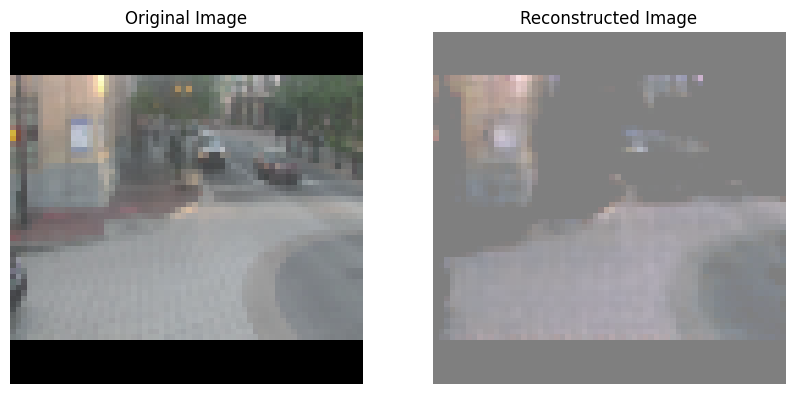

0.26669514179229736

In [117]:
# normal image
normal_image = "SmallerDataset/Test/Normal_Videos_912_x264_340.png"
visualize_reconstruction(model,  normal_image, transform, device=device)

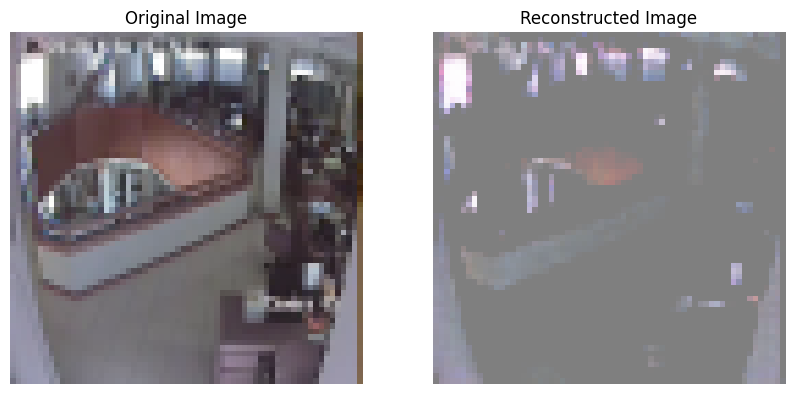

0.09539461135864258

In [118]:
normal_image_2 = "SmallerDataset/Test/Normal_Videos_923_x264_10660.png"
visualize_reconstruction(model,  normal_image_2, transform, device=device)

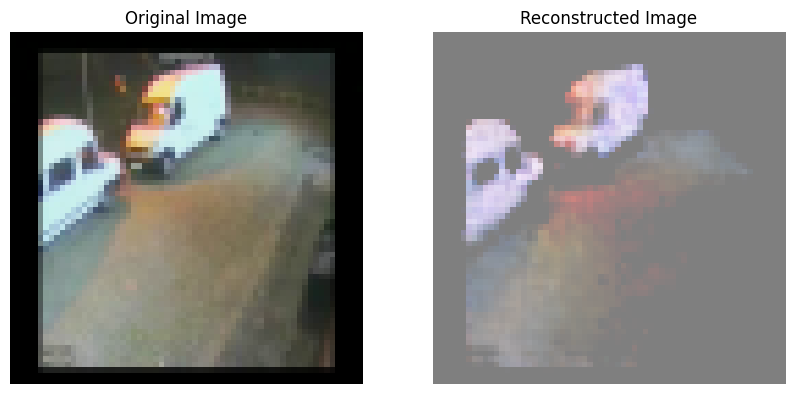

0.3150786757469177

In [119]:
# anomaly images
anomaly_1 = "SmallerDataset/AnomalyImages/Arson010_x264_1460.png"
visualize_reconstruction(model,  anomaly_1, transform, device=device)


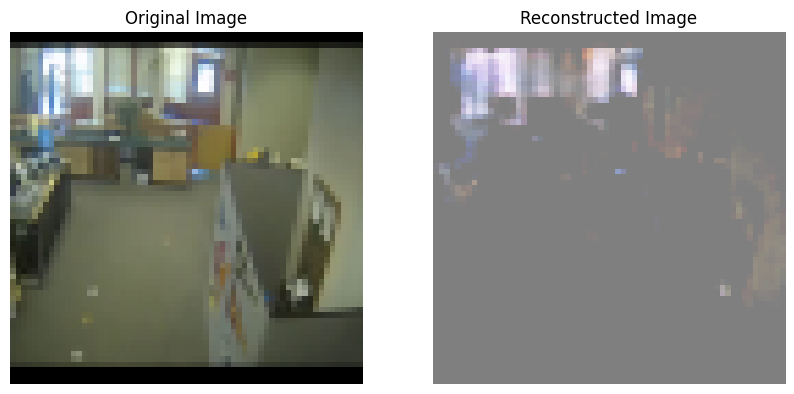

0.17399409413337708

In [120]:
anomaly_2 = "SmallerDataset/AnomalyImages/Arrest001_x264_480.png"
visualize_reconstruction(model,  anomaly_2, transform, device=device)

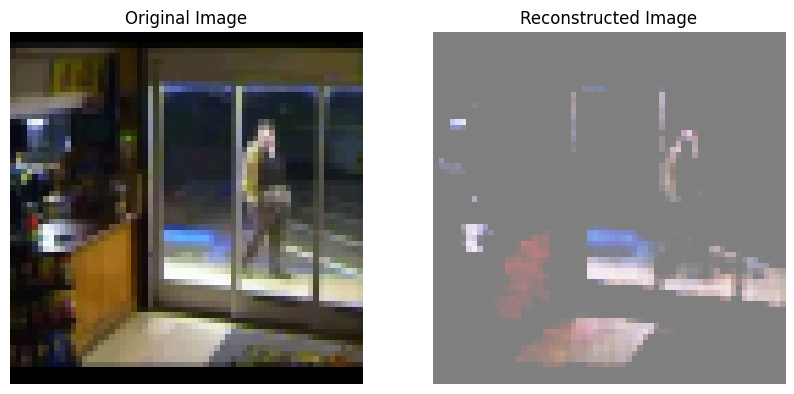

0.38731878995895386

In [121]:
anomaly_3 = "SmallerDataset/AnomalyImages/Vandalism017_x264_540.png"
visualize_reconstruction(model, anomaly_3, transform, device=device)

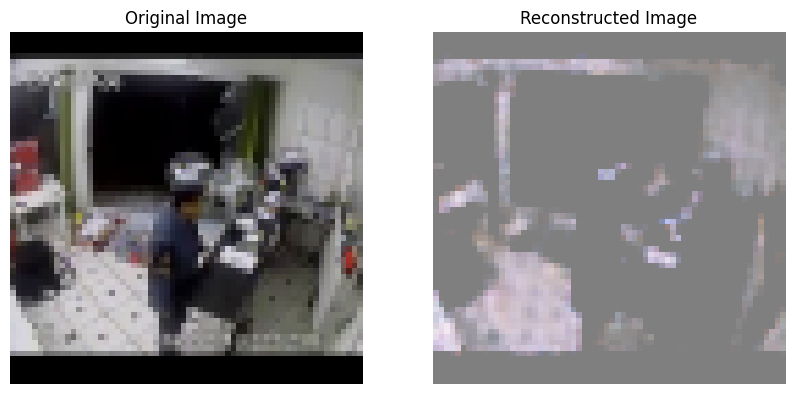

0.35973650217056274

In [122]:
anomaly_4 = "SmallerDataset/AnomalyImages/Shooting011_x264_3980.png"
visualize_reconstruction(model, anomaly_4, transform, device=device)